<a href="https://colab.research.google.com/github/malaika971/Multi-Variate-Regression-Case-Study-/blob/main/Multivariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multivariable regression pipeline to predict time taken for a package delivery business.**


## **Problem Statement**

Let's assume that you are a small business owner for Regional Delivery Service, Inc. (RDS) who offers same-day delivery for letters, packages, and other small cargo. You are able to use Google Maps to group individual deliveries into one trip to reduce time and fuel costs. Therefore some trips will have more than one delivery.
As the owner, you would like to be able to estimate how long a delivery will take based on 13 factors.



### **OBJECTIVES**

- Develop a multivariable regression pipeline to predict time taken for a package delivery business.
- Develop three different models (on the basis of given set of hypotheses) and compare their performance.


### **ABOUT DATA SET**
- Data set has 100 rows and 14 columns
- There are 13 feature variables and 1 target variable "Time Taken"


---
---
---

## **STEP#01: LOADING THE DATA**

### ***Importing Necessary Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/data_casestudy.csv')

In [ ]:
df.head()

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Weather Condition,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency,Time Taken
0,21.1,11.0,1.2,4.9,12,Snowy,9.8,2.9,1.1,20.4,300.2,22.5,5.1,28.0
1,49.7,19.0,5.9,2.5,5,Rainy,7.7,15.3,4.6,47.3,307.4,14.8,6.1,18.9
2,33.0,14.0,2.6,1.9,5,Clear,6.7,20.0,2.1,29.9,146.9,37.6,6.6,9.8
3,92.6,5.0,5.2,1.7,2,Snowy,1.5,18.6,2.5,91.1,314.1,37.4,9.2,17.2
4,12.2,5.0,0.9,6.1,11,Windy,9.5,14.2,1.2,11.7,407.3,0.6,5.3,24.6


In [ ]:

df.count().sum()

1357

#### **Dataframe has total of 1357 entities**

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Miles Travelled       99 non-null     float64
 1   Number of Deliveries  97 non-null     float64
 2   Petrol Consumed       96 non-null     float64
 3   Traffic Conditions    94 non-null     float64
 4   Number of Stops       100 non-null    int64  
 5   Weather Condition     100 non-null    object 
 6   Vehicle Age           97 non-null     float64
 7   Driver Experience     96 non-null     float64
 8   Road Quality          97 non-null     float64
 9   Delivery Distance     96 non-null     float64
 10  Vehicle Load          96 non-null     float64
 11  Temperature           97 non-null     float64
 12  Fuel Efficiency       94 non-null     float64
 13  Time Taken            98 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 11.1+ KB


#### **INSIGHTS**

- DataFrame has 100 rows
- It has 12 feature variables with 11 numerical and one categorical
- It has one target variable "Timetaken"
- Some columns have some missing values


In [ ]:
df.describe()

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency,Time Taken
count,99.000000,97.000000,96.000000,94.000000,100.000000,97.000000,96.000000,97.000000,96.000000,96.000000,97.000000,94.000000,98.000000
mean,54.468687,9.814433,5.435417,3.745745,6.540000,5.992784,10.277083,3.112371,53.582292,498.673958,18.557732,6.982979,18.915306
std,25.403433,5.244700,3.110288,1.377598,4.178879,2.564714,5.906758,1.131118,26.073996,280.531748,15.067299,1.317185,8.536596
min,5.900000,1.000000,0.500000,1.400000,0.000000,1.300000,1.100000,1.100000,3.600000,105.700000,-9.500000,5.000000,0.600000
25%,34.000000,5.000000,3.000000,2.600000,3.000000,4.200000,4.950000,2.300000,31.925000,222.175000,6.800000,5.900000,12.175000
50%,53.800000,10.000000,5.150000,3.950000,6.000000,6.000000,10.050000,3.100000,51.800000,475.550000,18.300000,7.000000,18.850000
75%,75.450000,14.000000,7.625000,4.750000,10.000000,8.000000,15.400000,4.000000,75.050000,748.925000,32.900000,7.900000,24.500000
max,98.900000,19.000000,14.300000,6.600000,14.000000,10.000000,20.000000,5.000000,99.600000,995.800000,39.900000,9.500000,39.000000


---
---
## **STEP #02: PRE-PROCESSING**

#### **Our dataframe has one categorical column,so we need to convert it into numerical**

### **1.Applying OHE**
- Since our categorical feature "weather condition" is nominal (snowy,rainy,clear,windy),therefore using OHE instead of label encoder (specifically used when we have nominal relationship in categories)

In [ ]:
df.head()

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Weather Condition,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency,Time Taken
0,21.1,11.0,1.2,4.9,12,Snowy,9.8,2.9,1.1,20.4,300.2,22.5,5.1,28.0
1,49.7,19.0,5.9,2.5,5,Rainy,7.7,15.3,4.6,47.3,307.4,14.8,6.1,18.9
2,33.0,14.0,2.6,1.9,5,Clear,6.7,20.0,2.1,29.9,146.9,37.6,6.6,9.8
3,92.6,5.0,5.2,1.7,2,Snowy,1.5,18.6,2.5,91.1,314.1,37.4,9.2,17.2
4,12.2,5.0,0.9,6.1,11,Windy,9.5,14.2,1.2,11.7,407.3,0.6,5.3,24.6


In [ ]:
ohe=OneHotEncoder()

In [ ]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = ohe.fit_transform(df[['Weather Condition']])

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['Weather Condition']))

In [ ]:

encoded_df

,Weather Condition_Clear,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Windy
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
95,0.0,0.0,1.0,0.0
96,0.0,0.0,1.0,0.0
97,0.0,1.0,0.0,0.0
98,1.0,0.0,0.0,0.0


In [ ]:
# Concatenating the encoded DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
# Droping the original 'Weather Condition' column
df.drop('Weather Condition', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Miles Travelled          99 non-null     float64
 1   Number of Deliveries     97 non-null     float64
 2   Petrol Consumed          96 non-null     float64
 3   Traffic Conditions       94 non-null     float64
 4   Number of Stops          100 non-null    int64  
 5   Vehicle Age              97 non-null     float64
 6   Driver Experience        96 non-null     float64
 7   Road Quality             97 non-null     float64
 8   Delivery Distance        96 non-null     float64
 9   Vehicle Load             96 non-null     float64
 10  Temperature              97 non-null     float64
 11  Fuel Efficiency          94 non-null     float64
 12  Time Taken               98 non-null     float64
 13  Weather Condition_Clear  100 non-null    float64
 14  Weather Condition_Rainy  10

In [ ]:
df.head()

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency,Time Taken,Weather Condition_Clear,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Windy
0,21.1,11.0,1.2,4.9,12,9.8,2.9,1.1,20.4,300.2,22.5,5.1,28.0,0.0,0.0,1.0,0.0
1,49.7,19.0,5.9,2.5,5,7.7,15.3,4.6,47.3,307.4,14.8,6.1,18.9,0.0,1.0,0.0,0.0
2,33.0,14.0,2.6,1.9,5,6.7,20.0,2.1,29.9,146.9,37.6,6.6,9.8,1.0,0.0,0.0,0.0
3,92.6,5.0,5.2,1.7,2,1.5,18.6,2.5,91.1,314.1,37.4,9.2,17.2,0.0,0.0,1.0,0.0
4,12.2,5.0,0.9,6.1,11,9.5,14.2,1.2,11.7,407.3,0.6,5.3,24.6,0.0,0.0,0.0,1.0


#### ***Feature variable 'Weather Condition' has been converted to numerical feature***

***

### **2. Dealing with Null Values**

In [ ]:
df.isnull().sum().sum()

43

#### ***Applying Simple Imputer***
- Our dataframe has 43 null values
- Dropping them would result in loss of information
- Therefore appllying simpleImputer with strategy=mean to fill the null values.
- This will maintain the overall distribution of data.

In [ ]:
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [ ]:
df.head()

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency,Time Taken,Weather Condition_Clear,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Windy
0,21.1,11.0,1.2,4.9,12.0,9.8,2.9,1.1,20.4,300.2,22.5,5.1,28.0,0.0,0.0,1.0,0.0
1,49.7,19.0,5.9,2.5,5.0,7.7,15.3,4.6,47.3,307.4,14.8,6.1,18.9,0.0,1.0,0.0,0.0
2,33.0,14.0,2.6,1.9,5.0,6.7,20.0,2.1,29.9,146.9,37.6,6.6,9.8,1.0,0.0,0.0,0.0
3,92.6,5.0,5.2,1.7,2.0,1.5,18.6,2.5,91.1,314.1,37.4,9.2,17.2,0.0,0.0,1.0,0.0
4,12.2,5.0,0.9,6.1,11.0,9.5,14.2,1.2,11.7,407.3,0.6,5.3,24.6,0.0,0.0,0.0,1.0


In [ ]:
df.isnull().sum().sum()

0

### **INSIGHTS**
- After applying simple imputer, we got zero null values.

---
---
## **STEP 03: EXPLORATORY DATA ANALYSIS**

- Using heatmap and pairplot to analyze the relationship:
       > Between feature variables and target.
       > Among different feature variables.


In [ ]:
corr_matrix = df.corr()

#### **HEATMAP**

<Axes: >

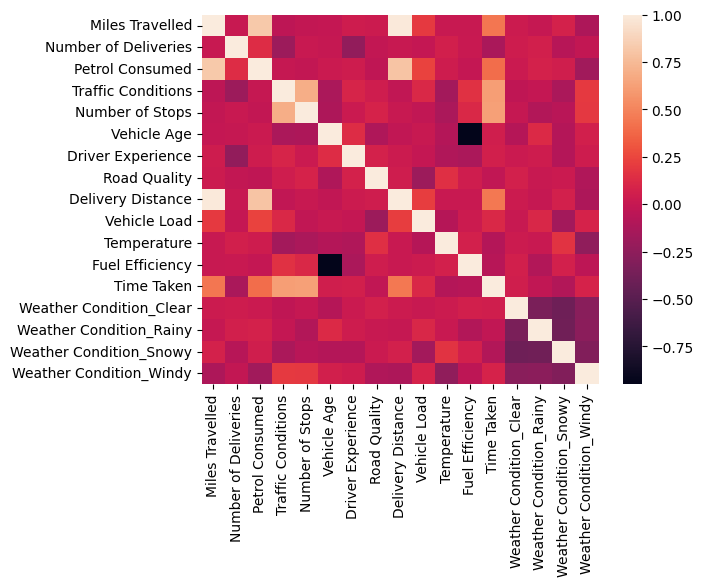

In [ ]:

sns.heatmap(corr_matrix)

### **PAIRPLOT**

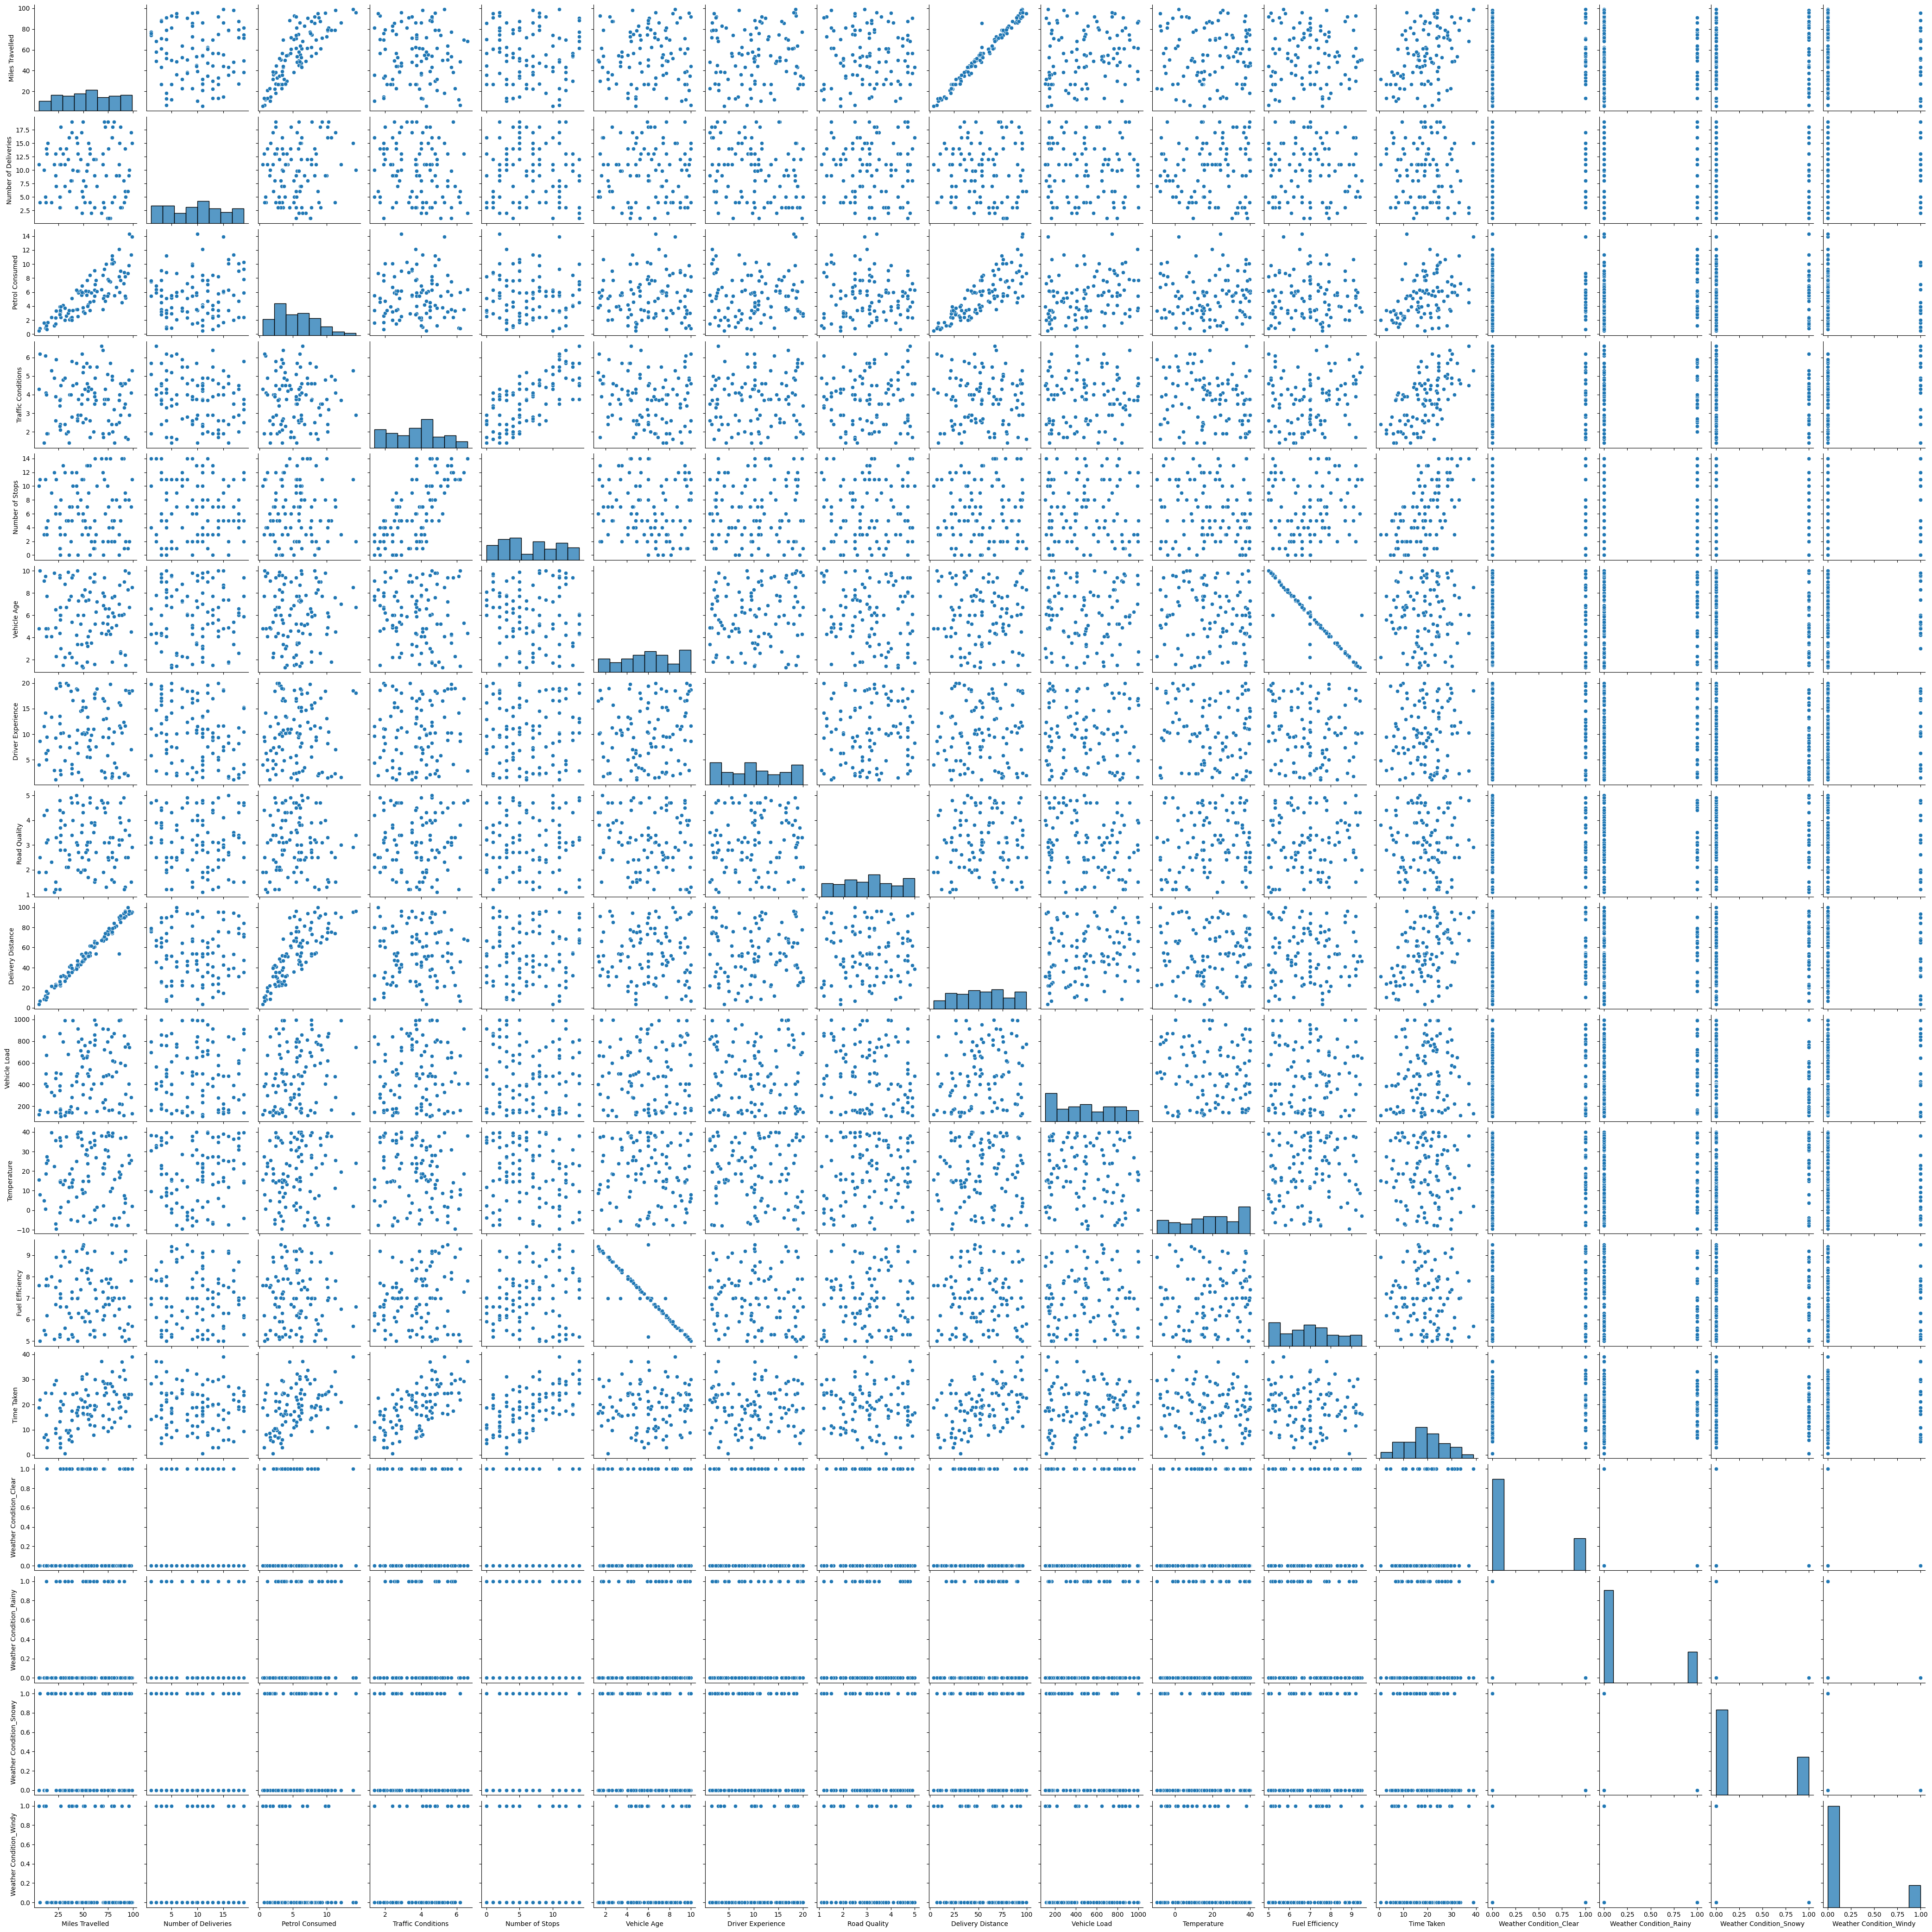

In [ ]:
sns.pairplot(df)

---
---
## **STEP 04: HYPOTHESIS FORMULATION**

## **Hypothesis 1:**
- Including all available features in the linear regression model will provide the most accurate predictions.


## **Hypothesis 2:**
- A linear regression model built using only features that are significantly correlated with the target variable will outperform the model using all features, as it focuses on the most relevant predictors.


## **Hypothesis 3:**
- Excluding features that exhibit multicollinearity from the linear regression model will yield better performance compared to both the all-features model and the correlated features model.

---
---

## **STEP 05: FEATURE SELECTION**

## **Hypothesis 1**

- Since we are working with Hypothesis 1,Therefore selecting all the input feature variables.
- Including all 12 feature variables and one target variable i.e "Time Taken"

In [ ]:
df = pd.DataFrame(df)

In [ ]:
# X1 is feature variable set and y1 is target variable for Hypothesis 1
X1=df.drop('Time Taken',axis=1)
y1=df['Time Taken']

In [ ]:
# Creating an object of StandardScaler
scaler = StandardScaler()

In [ ]:
X1=scaler.fit_transform(X1)

In [ ]:
# Converting the NumPy array X1 back into a Pandas DataFrame
X1 = pd.DataFrame(X1, columns=df.drop('Time Taken', axis=1).columns)
X1.head()

,Miles Travelled,Number of Deliveries,Petrol Consumed,Traffic Conditions,Number of Stops,Vehicle Age,Driver Experience,Road Quality,Delivery Distance,Vehicle Load,Temperature,Fuel Efficiency,Weather Condition_Clear,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Windy
0,-1.326886,0.230712,-1.397120,0.868836,1.313153,1.515071,-1.281368,-1.815785,-1.305681,-0.725871,0.267039,-1.482372,-0.592749,-0.577350,1.491914,-0.468521
1,-0.189624,1.787515,0.153250,-0.937702,-0.370376,0.679382,0.872459,1.342304,-0.247200,-0.699539,-0.254539,-0.695124,-0.592749,1.732051,-0.670280,-0.468521
2,-0.853690,0.814513,-0.935308,-1.389337,-0.370376,0.281435,1.688829,-0.913474,-0.931868,-1.286530,1.289875,-0.301499,1.687055,-0.577350,-0.670280,-0.468521
3,1.516269,-0.936891,-0.077656,-1.539882,-1.091889,-1.787890,1.445655,-0.552549,1.476274,-0.675035,1.276328,1.745346,-0.592749,-0.577350,1.491914,-0.468521
4,-1.680789,-0.936891,-1.496080,1.772105,1.072649,1.395687,0.681394,-1.725554,-1.648015,-0.334179,-1.216411,-1.324922,-0.592749,-0.577350,-0.670280,2.134375


---
## **Hypothesis 2**
- Generating heatmap to observe the pearson coefficient correlation value.

- Pearson correlation coefficients (𝑟) measure the linear relationship between two variables.

- r values range from -1 to 1.

- r=1: Perfect positive correlation (as one variable increases, the other increases).

- r=−1: Perfect negative correlation (as one variable increases, the other decreases).

- r=0: No linear correlation (no relationship between the variables).


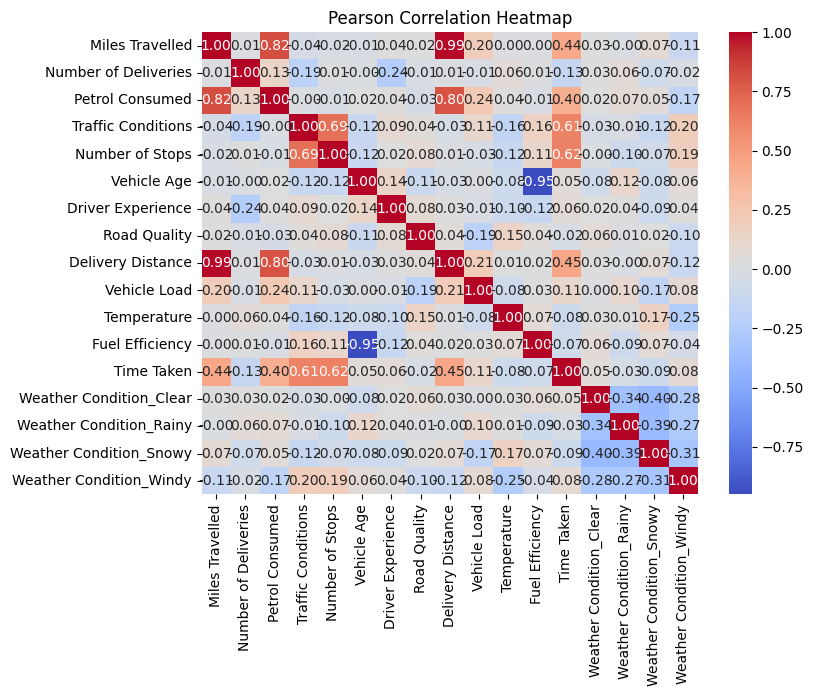

In [ ]:
# Calculating the correlation matrix so heatmap may display the correlation coefficient values too
correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

### **INSIGHTS**

From the above heatmap we can clearly observe that pearson coefficient value is highest for these feature variables:

- Number of stops (0.62)
- Traffic Conditions (0.61)
- Delivery Distance (0.45)
- Miles Travelled (0.44)

Therefore, selecting these 4 input features for our Hypothesis 2 model.

In [ ]:
# X2 is features and y2 is target for Hypothesis 2

X2=df[['Number of Stops','Traffic Conditions','Delivery Distance','Miles Travelled']]
y2=df['Time Taken']

In [ ]:
# Scaling the feature variable values

X2=scaler.fit_transform(X2)

In [ ]:
# After scaling the X2 is converted into numpy array,Now converting it back into pandas dataframe

X2 = pd.DataFrame(X2, columns=['Number of Stops','Traffic Conditions','Delivery Distance','Miles Travelled'])
X2.head()

,Number of Stops,Traffic Conditions,Delivery Distance,Miles Travelled
0,1.313153,0.868836,-1.305681,-1.326886
1,-0.370376,-0.937702,-0.247200,-0.189624
2,-0.370376,-1.389337,-0.931868,-0.853690
3,-1.091889,-1.539882,1.476274,1.516269
4,1.072649,1.772105,-1.648015,-1.680789


#### ***Feature variable values have been scaled***

---
## **Hypothesis 3**

- Deciding threshold of 0.7. if r>0.7, we will drop one of the features.if r<0.7, we may keep both or drop one.


From the above heatmap, we can clearly observe that:

1. **Miles Travelled** and **Delivery Distance** have a correlation of **0.99**, which is extremely high.
    - We need to discard one and keep the other,since keeping both of them will cause multicollinearity


2. **Miles Travelled** and **Petrol Consumed** have a correlation of **0.82**.

     - We need to Keep one of them, as including both would likely cause multicollinearity.

3. **Number of Stops** and **Traffic Conditions** have a correlation of **0.69**.

     - It's a moderate correlation. We can still use in the model as 0.69 isn’t excessively high, but we may choose to remove one if model performance isn't good.
     - At first, we will Keep both of them.


4. **Fuel Efficiency** and **Petrol Consumed** have correlation value **-0.95**.Which is high.

     - Need to Keep only one as including both would definitely cause multicollinearity.



---
- **The possible pair of features we can have for our model is**:
    - Number of Stops, correlated with target variable "time taken" at 0.62 (Based on Point# 3)
    - Traffic Conditions, correlated with target variable "time taken" at 0.61 (Based on Point# 3)
    - Miles travelled, correlated high (0.44) with target variable "time taken" compared to Petrol consumed(0.40).(Based on Point#02)
    - Petrol Consumed, correlated high (0.40) with target variable "time taken",compared to fuel efficiency(0.07).(Based on Point#04)
    - Cant select "Delivery Distance" since we have already chosen "Miles Travelled and these two highly correlated(0.99).(Based on Point#01)





In [ ]:
# X3 is features and y3 is target for Hypothesis 3

X3=df[['Number of Stops','Traffic Conditions','Miles Travelled','Petrol Consumed']]
y3=df['Time Taken']

In [ ]:
# Scaling the feature variable values

X3 = scaler.fit_transform(X3)

In [ ]:
# After scaling the X3 is converted into numpy array,Now converting it back into pandas dataframe

X3 = pd.DataFrame(X3, columns=df[['Number of Stops','Traffic Conditions','Miles Travelled','Petrol Consumed']].columns)
X3.head()

,Number of Stops,Traffic Conditions,Miles Travelled,Petrol Consumed
0,1.313153,0.868836,-1.326886,-1.397120
1,-0.370376,-0.937702,-0.189624,0.153250
2,-0.370376,-1.389337,-0.853690,-0.935308
3,-1.091889,-1.539882,1.516269,-0.077656
4,1.072649,1.772105,-1.680789,-1.496080


---
---
## **STEP 06: PREPARING DATA FOR TRAINING**
- Splitting the data into training and testing data

In [ ]:
# FOR HYPOTHESIS 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
# FOR HYPOTHESIS 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
# FOR HYPOTHESIS 3
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

---
---
## **STEP 07: MODEL TRAINING**

In [ ]:
# FOR HYPOTHESIS 1

model_all_features = LinearRegression()
model_all_features=model_all_features.fit(X_train1, y_train1)

In [ ]:
# FOR HYPOTHESIS 2

model_correlated_features = LinearRegression()
model_correlated_features=model_correlated_features.fit(X_train2, y_train2)

In [ ]:
# FOR HYPOTHESIS 3

model_no_multicollinearity = LinearRegression()
model_no_multicollinearity=model_no_multicollinearity.fit(X_train3, y_train3)

---
---
## **STEP 08: MODEL EVALUATION**



In [ ]:
# FOR FIRST MODEL

mse_all_features=mean_squared_error(y_test1, model_all_features.predict(X_test1))
r2_all_features=r2_score(y_test1, model_all_features.predict(X_test1))

In [ ]:
# For SECOND MODEL

mse_correlated_features=mean_squared_error(y_test2, model_correlated_features.predict(X_test2))
r2_correlated_features=r2_score(y_test2, model_correlated_features.predict(X_test2))

In [ ]:
# FOR THIRD MODEL

mse_no_multicollinearity=mean_squared_error(y_test3, model_no_multicollinearity.predict(X_test3))
r2_no_multicollinearity=r2_score(y_test3, model_no_multicollinearity.predict(X_test3))

In [ ]:
print("All Features - MSE:", mse_all_features, "R-squared:",r2_all_features)

print("Correlated Features - MSE:", mse_correlated_features, "R-squared:", r2_correlated_features)

print("No Multicollinearity - MSE:", mse_no_multicollinearity, "R-squared:", r2_no_multicollinearity)


All Features - MSE: 21.14979303890079 R-squared: 0.6471651689573914
Correlated Features - MSE: 15.993902337563748 R-squared: 0.7331791465473565
No Multicollinearity - MSE: 15.458541308382209 R-squared: 0.7421103931997768


---
---
## **MODELS COMPARISON**
- Our hypothesis that we did set initially are yielding true predictions.
- For second model, when we select those features only with highest correlation with target variable,We got better R2_score: 0.73 and less MSE: 15.99 compared to model with all features,R2_score: 0.64 and MSE: 21.14
- For third model, when we excluded the features showing highest multicollinearity, we got more better results, R2_Score:0.74 and MSE:15.4 compared to second model,R2_score: 0.73 and MSE: 15.99.

---